In [1]:
import xlrd as xl

In [2]:
SheetNumber=0
wb=xl.open_workbook('home_pricesinusa.xlsx')

In [3]:
sheet=wb.sheet_by_index(SheetNumber)

In [4]:
sheet.nrows

6

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
df=pd.read_excel('home_pricesinusa.xlsx')

In [7]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [8]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF1711A688>,
      dtype=object)

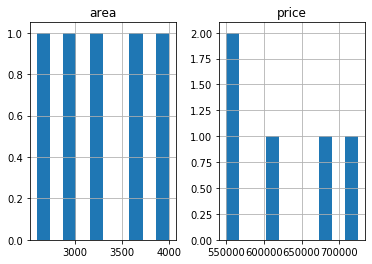

In [9]:
df.hist()

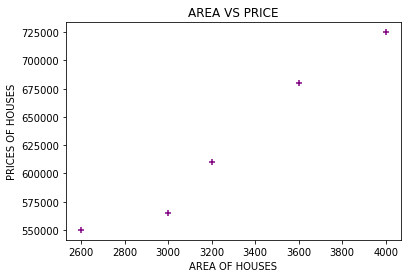

In [10]:
plt.xlabel('AREA OF HOUSES')
plt.ylabel('PRICES OF HOUSES')
plt.title('AREA VS PRICE')
plt.scatter(df.area,df.price,color='purple',marker='+')

In [11]:
df.keys()
a=df[['area']]
b=df['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF1C903808>,
      dtype=object)

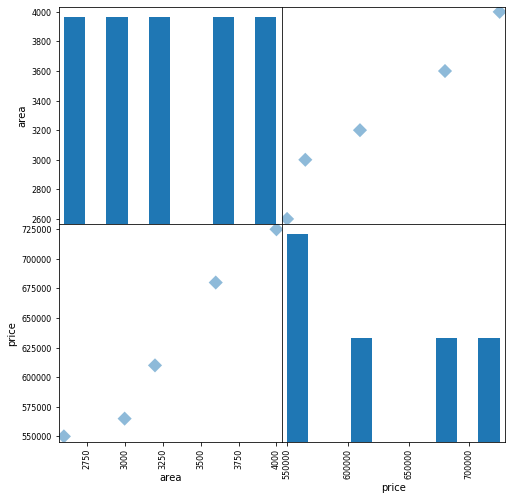

In [12]:
pd.plotting.scatter_matrix(df,figsize=[8,8],s=100,marker='D')

In [13]:
x=df.drop(df[['price']],axis=1).values
y=df['price'].values

## PREDICTION USING TRAIN_TEST_SPLIT

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [50]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
reg.predict(x_test)

array([602500., 505000.])

In [52]:
reg.score(x_test,y_test)

-0.15625000000000666

In [53]:
reg.coef_

array([162.5])

In [54]:
reg.intercept_

82499.99999999988

In [55]:
price=135.34482759*3300+183362.06896551716
price

630000.0000125172

## PREDICTION WITHOUT USING TRAIN_TEST_SPLIT

In [56]:
re=LinearRegression()
re.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
import numpy as np

In [58]:
pred=np.array((3300,5000)).reshape(-1,1)
a=re.predict(pred)

In [59]:
re.score(df[['area']],df.price)

0.9584301138199486

In [60]:
print("The price of the house which has an area of {0}sqft and {1}sqft is ${2} and ${3} respect.  ".format(pred[0][0],pred[1][0],a[0],a[1]))

The price of the house which has an area of 3300sqft and 5000sqft is $628715.7534246575 and $859554.7945205481 respect.  


In [61]:
df.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


In [62]:
c=re.coef_
c

array([135.78767123])

In [63]:
i=re.intercept_
i

180616.43835616432

In [64]:
price=(c*3300+i)
price

array([628715.75342466])

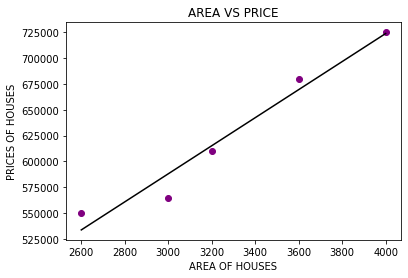

In [65]:
plt.xlabel('AREA OF HOUSES')
plt.ylabel('PRICES OF HOUSES')
plt.title('AREA VS PRICE')
plt.scatter(df.area,df.price,color='purple',marker='o')
plt.plot(df.area,re.predict(df[['area']]),color='black')